# Predicting defaults on Lending Club database


- Authors: Beltrán Aller López and Miguel López Garralón
- Date: 13/12/2019
- Email: beltran.aller@cunef.edu and m.lopez@cunef.edu
- Institution: CUNEF
- Version: 1.0

We are going to do the same operations that we made in the DataEngineering notebook. The only thing that we don´t do is to quit outliers values

Before doing anything, we will import the necessaries libraries.

In [1]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt # plots
import seaborn as sns # plots
from scipy import stats as sts # normality test JB
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error # MSE
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing # estandarization
from math import sqrt # sqrt
import itertools # aplanar arrays
import math
import random
random.seed(1122019)

The following variable indicates the route in which we have our dataset.

In [2]:
data_path = '../data/test_set.csv'

## 1. READING THE DATA

The dataset is kept into the data directory. In the same folder you can find the data dictionary.

In [3]:
loan = pd.read_csv(data_path, index_col='Unnamed: 0')

In [4]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,target
1000000,NaN,NaN,20000,20000,20000.0,36 months,9.49,640.57,B,B2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1000001,NaN,NaN,2500,2500,2500.0,36 months,11.47,82.41,B,B5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1000002,NaN,NaN,17825,17825,17825.0,36 months,17.99,644.33,D,D2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1000003,NaN,NaN,9500,9500,9500.0,36 months,8.18,298.49,B,B1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1000004,NaN,NaN,15000,15000,14800.0,36 months,12.49,501.74,B,B4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1000005,NaN,NaN,6000,6000,6000.0,36 months,9.17,191.28,B,B1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1000006,NaN,NaN,11875,11875,11875.0,60 months,14.49,279.34,C,C4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1000007,NaN,NaN,24000,24000,24000.0,36 months,7.90,750.97,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
1000008,NaN,NaN,21000,21000,21000.0,60 months,16.55,516.84,D,D2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1000009,NaN,NaN,21500,21500,21400.0,36 months,9.17,685.40,B,B2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0


## 2. FILTERING DATA

In [5]:
del loan['num_rev_tl_bal_gt_0'] # run only if the EDA has not been run

We want to keep the biggest number of variables at the beggining, because the more number of variables you have, the more possibilities you have to generate a better prediction model. In order to continue with that philosophy, we will only delete the variables with a percentage over the 95%.

In [6]:
NaN = pd.DataFrame(round(loan.isnull().sum()/len(loan.index)*100,2),columns=['null_percent'])

In [7]:
Filtro = NaN['null_percent']>95
Nulls = NaN[Filtro]
loan_filtered = loan.drop(list(Nulls.index), axis=1)

We check the dimension of the dataset.

In [8]:
loan_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332020 entries, 1000000 to 1332019
Columns: 106 entries, loan_amnt to target
dtypes: float64(79), int64(5), object(22)
memory usage: 271.0+ MB


The percentage of NaN is the following.

In [9]:
percentage_NaN = loan_filtered.apply(lambda x: sum(x.isna()/len(loan_filtered)))
percentage_NaN.sort_values(ascending = False).head(40)

desc                              0.905292
mths_since_last_record            0.830146
mths_since_recent_bc_dlq          0.763722
mths_since_last_major_derog       0.737919
mths_since_recent_revol_delinq    0.667300
il_util                           0.660424
mths_since_rcnt_il                0.618390
all_util                          0.608189
open_act_il                       0.608153
open_rv_24m                       0.608153
open_rv_12m                       0.608153
total_bal_il                      0.608153
inq_fi                            0.608153
open_acc_6m                       0.608153
open_il_24m                       0.608153
open_il_12m                       0.608153
total_cu_tl                       0.608153
inq_last_12m                      0.608153
max_bal_bc                        0.608153
mths_since_last_delinq            0.505295
mths_since_recent_inq             0.130480
num_tl_120dpd_2m                  0.089618
mo_sin_old_il_acct                0.081092
emp_title  

We will proceed with the attribution of the NaN, some of those variables could have a NaN as value due to the inexistance of that type of account, so the correctly assignment will be give them a zero or calculateing the maximum. 

Values will be zero due to the customer has never done that action or now he/she is not commiting it and if he/she has not that type of account at this moment or or he/she has never had that type of account.

* 'il_util', ratio of total current balance to high credit/credit limit on all install account. 
* 'all_util', balance to credit limit on all trades. 
* 'inq_last_12m', number of credit inquiries in past 12 months. 
* 'total_cu_tl', number of finance trades.
* 'open_acc_6m', number of open trades in last 6 months.
* 'open_act_il', number of currently active installment trades.
* 'inq_fi', number of personal finance inquiries.
* 'max_bal_bc', maximum current balance owed on all revolving accounts.
* 'open_rv_12m', number of revolving trades opened in past 12 months.
* 'open_rv_24m', number of revolving trades opened in past 24 months.
* 'total_bal_il', total current balance of all installment accounts.
* 'open_il_12m', number of installment accounts opened in past 12 months.
* 'open_il_24m', number of installment accounts opened in past 24 months.

There are other kind of variables that they will be enconding calculateing the maximum of them.

* 'mths_since_last_record', the number of months since the last public record.
* 'mths_since_recent_bc_dlq', months since most recent bankcard delinquency,
* 'mths_since_recent_revol_delinq', months since most recent revolving delinquency.
* 'mths_since_rcnt_il', months since most recent installment accounts opened.
* 'mths_since_last_delinq', the number of months since the borrower's last delinquency.
* 'mths_since_recent_inq', months since most recent inquiry.

In [10]:
def fill_w_0(data, column):
    data[column].fillna(0, inplace = True)

In [11]:
def fill_max(data, column):
    data[column].fillna(data[column].max(), inplace = True) 

In [12]:
# refilling with 0

fill_w_0(loan_filtered, 'il_util')
fill_w_0(loan_filtered, 'all_util')
fill_w_0(loan_filtered, 'inq_last_12m')
fill_w_0(loan_filtered, 'total_cu_tl')
fill_w_0(loan_filtered, 'open_acc_6m')
fill_w_0(loan_filtered, 'open_act_il')
fill_w_0(loan_filtered, 'inq_fi')
fill_w_0(loan_filtered, 'max_bal_bc')
fill_w_0(loan_filtered, 'open_rv_12m')
fill_w_0(loan_filtered, 'open_rv_24m')
fill_w_0(loan_filtered, 'total_bal_il')
fill_w_0(loan_filtered, 'open_il_12m')
fill_w_0(loan_filtered, 'open_il_24m')

In [13]:
# refilling with the maximum

fill_max(loan_filtered, 'mths_since_last_record')
fill_max(loan_filtered, 'mths_since_recent_bc_dlq')
fill_max(loan_filtered, 'mths_since_recent_revol_delinq')
fill_max(loan_filtered, 'mths_since_last_major_derog')
fill_max(loan_filtered, 'mths_since_rcnt_il')
fill_max(loan_filtered, 'mths_since_last_delinq')
fill_max(loan_filtered, 'mths_since_recent_inq')

Now the percentage of NaN is:

In [14]:
percentage_NaN = loan_filtered.apply(lambda x: sum(x.isna()/len(loan_filtered)))
percentage_NaN.sort_values(ascending = False).head(25)

desc                          0.905292
num_tl_120dpd_2m              0.089618
mo_sin_old_il_acct            0.081092
emp_title                     0.063987
emp_length                    0.058304
pct_tl_nvr_dlq                0.052753
avg_cur_bal                   0.052641
mo_sin_old_rev_tl_op          0.052638
mo_sin_rcnt_rev_tl_op         0.052638
num_rev_accts                 0.052635
mo_sin_rcnt_tl                0.052635
num_actv_rev_tl               0.052635
num_bc_tl                     0.052635
num_il_tl                     0.052635
num_op_rev_tl                 0.052635
num_actv_bc_tl                0.052635
tot_coll_amt                  0.052635
num_tl_op_past_12m            0.052635
num_tl_30dpd                  0.052635
num_tl_90g_dpd_24m            0.052635
tot_cur_bal                   0.052635
tot_hi_cred_lim               0.052635
total_rev_hi_lim              0.052635
total_il_high_credit_limit    0.052635
num_accts_ever_120_pd         0.052635
dtype: float64

Now, we are going to fill de NAs values of the 'desc' column with zeros. We will transform this column in a dummy variable, if we don´t have the description we will obtain a 0, if something was written at the description, we will obtain the value = 1.

In [15]:
loan_filtered['desc'].fillna(0, inplace = True)
loan_filtered['desc'] = np.where(loan_filtered['desc'] != 0, 1, 0)
loan_filtered['desc'].value_counts(normalize=True)

0    0.905292
1    0.094708
Name: desc, dtype: float64

We want to know hoy many samples have we got with NAs, so we will count the number rows with NAs.

In [16]:
len(loan_filtered) - len(loan_filtered.dropna())

63619

We have around 192 000 of rows with NAs.

Now we will create 2 distinct dataframes ir order to split numerical and categorical variables, we need to work in a different way with them.

In [17]:
numericas = loan_filtered.select_dtypes(include = [np.number])
categoricas = loan_filtered.select_dtypes(include = [np.object])

In [18]:
numericas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332020 entries, 1000000 to 1332019
Data columns (total 85 columns):
loan_amnt                         332020 non-null int64
funded_amnt                       332020 non-null int64
funded_amnt_inv                   332020 non-null float64
int_rate                          332020 non-null float64
installment                       332020 non-null float64
annual_inc                        332020 non-null float64
desc                              332020 non-null int32
dti                               331934 non-null float64
delinq_2yrs                       332016 non-null float64
inq_last_6mths                    332016 non-null float64
mths_since_last_delinq            332020 non-null float64
mths_since_last_record            332020 non-null float64
open_acc                          332016 non-null float64
pub_rec                           332016 non-null float64
revol_bal                         332020 non-null int64
revol_util          

In [19]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332020 entries, 1000000 to 1332019
Data columns (total 21 columns):
term                    332020 non-null object
grade                   332020 non-null object
sub_grade               332020 non-null object
emp_title               310775 non-null object
emp_length              312662 non-null object
home_ownership          332020 non-null object
verification_status     332020 non-null object
issue_d                 332020 non-null object
pymnt_plan              332020 non-null object
purpose                 332020 non-null object
title                   328143 non-null object
zip_code                332020 non-null object
addr_state              332020 non-null object
earliest_cr_line        332016 non-null object
initial_list_status     332020 non-null object
last_pymnt_d            331440 non-null object
last_credit_pull_d      332009 non-null object
application_type        332020 non-null object
hardship_flag           332020 non-n

In [20]:
categoricas.nunique()

term                         2
grade                        7
sub_grade                   35
emp_title               121292
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    139
pymnt_plan                   2
purpose                     14
title                    19161
zip_code                   906
addr_state                  51
earliest_cr_line           696
initial_list_status          2
last_pymnt_d               135
last_credit_pull_d         134
application_type             2
hardship_flag                2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

We impute the NaN of numeric variables by the mean of each variable.

In [21]:
numericas = numericas.apply(lambda x: x.replace("", np.nan))
numericas = numericas.apply(lambda x: x.fillna(x.mean()))

In [22]:
numericas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332020 entries, 1000000 to 1332019
Data columns (total 85 columns):
loan_amnt                         332020 non-null int64
funded_amnt                       332020 non-null int64
funded_amnt_inv                   332020 non-null float64
int_rate                          332020 non-null float64
installment                       332020 non-null float64
annual_inc                        332020 non-null float64
desc                              332020 non-null int64
dti                               332020 non-null float64
delinq_2yrs                       332020 non-null float64
inq_last_6mths                    332020 non-null float64
mths_since_last_delinq            332020 non-null float64
mths_since_last_record            332020 non-null float64
open_acc                          332020 non-null float64
pub_rec                           332020 non-null float64
revol_bal                         332020 non-null int64
revol_util          

We impute the NaN of categorical variables by the mode of each variable.

In [23]:
categoricas = categoricas.apply(lambda x: x.replace("", np.nan))
categoricas = categoricas.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [24]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332020 entries, 1000000 to 1332019
Data columns (total 21 columns):
term                    332020 non-null object
grade                   332020 non-null object
sub_grade               332020 non-null object
emp_title               332020 non-null object
emp_length              332020 non-null object
home_ownership          332020 non-null object
verification_status     332020 non-null object
issue_d                 332020 non-null object
pymnt_plan              332020 non-null object
purpose                 332020 non-null object
title                   332020 non-null object
zip_code                332020 non-null object
addr_state              332020 non-null object
earliest_cr_line        332020 non-null object
initial_list_status     332020 non-null object
last_pymnt_d            332020 non-null object
last_credit_pull_d      332020 non-null object
application_type        332020 non-null object
hardship_flag           332020 non-n

In [25]:
categoricas.nunique()

term                         2
grade                        7
sub_grade                   35
emp_title               121292
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    139
pymnt_plan                   2
purpose                     14
title                    19161
zip_code                   906
addr_state                  51
earliest_cr_line           696
initial_list_status          2
last_pymnt_d               135
last_credit_pull_d         134
application_type             2
hardship_flag                2
disbursement_method          2
debt_settlement_flag         2
dtype: int64

In [26]:
loan_filtered = pd.concat([numericas, categoricas], axis = 1)

In [27]:
loan_filtered.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,desc,dti,delinq_2yrs,inq_last_6mths,...,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
1000000,20000,20000,20000.0,9.49,640.57,120000.0,0,10.89,0.0,0.0,...,079xx,NJ,May-2009,w,Mar-2018,Apr-2018,Individual,N,Cash,N
1000001,2500,2500,2500.0,11.47,82.41,35000.0,0,17.35,0.0,0.0,...,752xx,TX,Feb-2005,w,Feb-2018,Feb-2018,Individual,N,Cash,N
1000002,17825,17825,17825.0,17.99,644.33,119000.0,0,16.87,0.0,1.0,...,473xx,IN,Oct-2006,f,Mar-2018,Aug-2018,Individual,N,Cash,N
1000003,9500,9500,9500.0,8.18,298.49,82000.0,0,24.69,0.0,1.0,...,850xx,AZ,May-2003,w,Feb-2016,Feb-2019,Individual,N,Cash,N
1000004,15000,15000,14800.0,12.49,501.74,66287.0,0,13.65,0.0,1.0,...,773xx,TX,Jun-1988,f,Mar-2016,Oct-2016,Individual,N,Cash,N
1000005,6000,6000,6000.0,9.17,191.28,125000.0,0,9.16,0.0,0.0,...,900xx,CA,Apr-2004,f,Feb-2017,Mar-2017,Individual,N,Cash,N
1000006,11875,11875,11875.0,14.49,279.34,52000.0,0,27.31,0.0,0.0,...,296xx,SC,Mar-2000,w,May-2018,Feb-2019,Individual,N,Cash,N
1000007,24000,24000,24000.0,7.90,750.97,65000.0,1,21.84,2.0,0.0,...,809xx,CO,Jul-1994,f,May-2014,May-2014,Individual,N,Cash,N
1000008,21000,21000,21000.0,16.55,516.84,50000.0,0,20.38,0.0,0.0,...,824xx,WY,Jul-2007,w,Oct-2018,Feb-2019,Individual,N,Cash,N
1000009,21500,21500,21400.0,9.17,685.40,91000.0,0,31.25,0.0,0.0,...,350xx,AL,May-2000,f,Aug-2017,May-2018,Individual,N,Cash,N


There are some variables wich have a lot of categories, more than we can deal with, so we will delete them. Another variables, due to a research, we discover that give us information wich we would not have when we were going to give a loan.

In [28]:
del loan_filtered['sub_grade']
del loan_filtered['emp_title']
del loan_filtered['issue_d']
del loan_filtered['zip_code']
del loan_filtered['addr_state']
del loan_filtered['funded_amnt']
del loan_filtered['funded_amnt_inv']
del loan_filtered['title']
del loan_filtered['last_credit_pull_d']
del loan_filtered['last_pymnt_d']
del loan_filtered['debt_settlement_flag']
del loan_filtered['total_pymnt']
del loan_filtered['total_pymnt_inv']
del loan_filtered['total_rec_int']
del loan_filtered['total_rec_late_fee']
del loan_filtered['total_rec_prncp']
del loan_filtered['last_pymnt_amnt']
del loan_filtered['out_prncp']
del loan_filtered['out_prncp_inv']
del loan_filtered['hardship_flag']
del loan_filtered['pymnt_plan']

In [29]:
loan_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332020 entries, 1000000 to 1332019
Data columns (total 85 columns):
loan_amnt                         332020 non-null int64
int_rate                          332020 non-null float64
installment                       332020 non-null float64
annual_inc                        332020 non-null float64
desc                              332020 non-null int64
dti                               332020 non-null float64
delinq_2yrs                       332020 non-null float64
inq_last_6mths                    332020 non-null float64
mths_since_last_delinq            332020 non-null float64
mths_since_last_record            332020 non-null float64
open_acc                          332020 non-null float64
pub_rec                           332020 non-null float64
revol_bal                         332020 non-null int64
revol_util                        332020 non-null float64
total_acc                         332020 non-null float64
recoveries        

There is a variable which we consider of vital importance, 'earliest_cr_line' indicates when the borrower's credit file started, the longer is the credit file, the more we can trust in the borrower.

In [30]:
x = loan_filtered['earliest_cr_line'] # we do a copy

In [31]:
x = x.astype(str) # convert to string

In [32]:
len(x) # show the length

332020

In [33]:
x = x.map(lambda x: x.split('-')) # splitting by the '-'

In [34]:
x.iloc[2] # show a sample

['Oct', '2006']

In [35]:
x.max()

['Sep', '2015']

In [36]:
# we calculate the length of the credit file substracting the currently year and the year the credit file was born

x = x.map(lambda x: 2019 - int(x[1]))

In [37]:
x # the final result

1000000    10
1000001    14
1000002    13
1000003    16
1000004    31
           ..
1332015    15
1332016    18
1332017    29
1332018    21
1332019    11
Name: earliest_cr_line, Length: 332020, dtype: int64

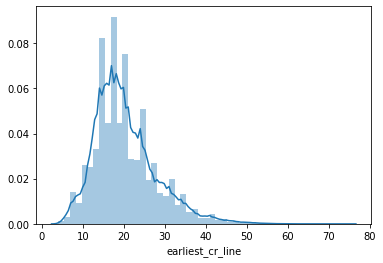

In [38]:
# histogram of credit file years

sns.distplot(x);

In [39]:
loan_filtered['earliest_cr_line'] = x # replacing the variable, now is numeric
del x

'home_ownership' has a lot of categories, when we will go to make dummies it will return us so many variables, in order to prevent it, we will reduce the dimension of this variable rencoding it.

In [40]:
loan_filtered['home_ownership'].value_counts()

MORTGAGE    164196
RENT        132074
OWN          35624
ANY             74
OTHER           41
NONE            11
Name: home_ownership, dtype: int64

In [41]:
loan_filtered['home_ownership'] = np.where((loan_filtered['home_ownership'] != 'OWN') & (loan_filtered['home_ownership'] != 'RENT'),
                                    'OTHER', loan_filtered['home_ownership'].values)

In [42]:
loan_filtered['home_ownership'].value_counts()

OTHER    164322
RENT     132074
OWN       35624
Name: home_ownership, dtype: int64

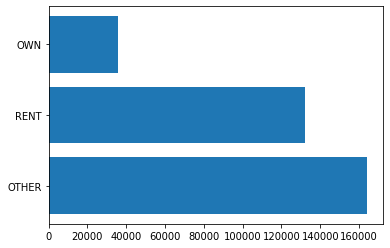

In [43]:
# barplot of homeownership

height = loan_filtered['home_ownership'].value_counts()
bars = ('OTHER', 'RENT', 'OWN')
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

The next step will be rencoding the variable 'emp_length', now we have 11 different values, we are going to rencode the variable ir order to have only 2 different values:
* From less than 1 year to 5 years.
* From 6 years to 10 years or more.

In [44]:
loan_filtered['emp_length'].value_counts()

10+ years    128332
2 years       29930
< 1 year      26601
3 years       26404
1 year        22042
5 years       20835
4 years       20138
6 years       15394
8 years       14988
7 years       14743
9 years       12613
Name: emp_length, dtype: int64

In [45]:
loan_filtered['emp_length'] = np.where((loan_filtered['emp_length'] == '< 1 year') | 
                                       (loan_filtered['emp_length'] == '1 year') |
                                       (loan_filtered['emp_length'] == '2 years') | 
                                       (loan_filtered['emp_length'] == '3 years') | 
                                       (loan_filtered['emp_length'] == '4 years') | 
                                       (loan_filtered['emp_length'] == '5 years'), 
                                       '<= 5 years', '6+ years')

We view the new values.

In [46]:
loan_filtered['emp_length'].value_counts()

6+ years      186070
<= 5 years    145950
Name: emp_length, dtype: int64

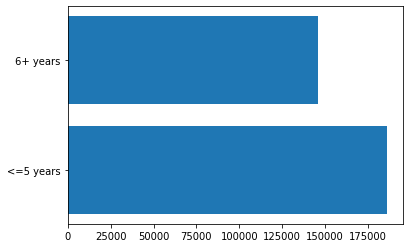

In [47]:
# barplot of emp_length

height = loan_filtered['emp_length'].value_counts()
bars = ('<=5 years', '6+ years')
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

In order to maintain the variable 'grade' and do not create as dummies as categories has the variable, we will apply an ordinal encondig to the variable. The method will be the following:
* We have 7 categories from best grade, 'A', to the worst grade 'G'.
* The order is A > B > C > D > E > F > G.
* The new encoding will be 6 > 5 > 4 > 3 > 2 > 1 > 0

In [48]:
loan_filtered['grade'].value_counts()

B    96161
C    94417
A    56968
D    50419
E    23711
F     8064
G     2280
Name: grade, dtype: int64

In [49]:
# first we create a mapper

mapper = {'A': 6, 'B': 5, 'C': 4, 'D': 3, 'E': 2, 'F': 1, 'G': 0}

# now we map the column and replace the values

loan_filtered['grade'] = loan_filtered['grade'].replace(mapper)

According to some financial papers, the loan purpose can serve as a method to decide the risk of the loan. We are going to see the different values of our variable 'purpose'.

In [50]:
loan_filtered['purpose'].value_counts()

debt_consolidation    192874
credit_card            72508
home_improvement       21465
other                  19285
major_purchase          7256
small_business          3829
medical                 3806
car                     3651
moving                  2330
vacation                2296
house                   1821
wedding                  583
renewable_energy         222
educational               94
Name: purpose, dtype: int64

How does affect the purpose in our target?

In [51]:
loan_filtered.groupby('purpose')['target'].value_counts()

purpose             target
car                 0           3088
                    1            563
credit_card         0          59067
                    1          13441
debt_consolidation  0         149197
                    1          43677
educational         0             78
                    1             16
home_improvement    0          17305
                    1           4160
house               0           1363
                    1            458
major_purchase      0           5702
                    1           1554
medical             0           2897
                    1            909
moving              0           1760
                    1            570
other               0          14844
                    1           4441
renewable_energy    0            180
                    1             42
small_business      0           2593
                    1           1236
vacation            0           1807
                    1            489
wedding    

We need to reduce the number of types, so we will create new 6 new types in which they will be aggregate the currently types. 

* debt_consolidation: 'debt_consolidation'.
* home: which will include 'home_improvement', 'house' and 'moving'.
* purchase: includes 'credit_card', 'major_purchase', 'vacation', 'car' and 'wedding'.
* investment: includes 'small_business' and 'renewable_energy'.
* medical: 'medical'.
* other: includes 'other' and 'educational'.

In [52]:
# home

loan_filtered['purpose'] = np.where((loan_filtered['purpose'] == 'home_improvement') | 
                                    (loan_filtered['purpose'] == 'house') | 
                                    (loan_filtered['purpose'] == 'moving'), 
                                   'home', loan_filtered['purpose'].values)

In [53]:
# purchase

loan_filtered['purpose'] = np.where((loan_filtered['purpose'] == 'credit_card') | 
                                    (loan_filtered['purpose'] == 'major_purchase') | 
                                    (loan_filtered['purpose'] == 'vacation') | 
                                    (loan_filtered['purpose'] == 'wedding') |
                                    (loan_filtered['purpose'] == 'car'), 
                                   'purchase', loan_filtered['purpose'].values)

In [54]:
# investment

loan_filtered['purpose'] = np.where((loan_filtered['purpose'] == 'small_business') | 
                                    (loan_filtered['purpose'] == 'renewable_energy'), 
                                   'investment', loan_filtered['purpose'].values)

In [55]:
# other

loan_filtered['purpose'] = np.where((loan_filtered['purpose'] == 'other') | 
                                    (loan_filtered['purpose'] == 'educational'), 
                                   'other', loan_filtered['purpose'].values)

In [56]:
loan_filtered['purpose'].value_counts()

debt_consolidation    192874
purchase               86294
home                   25616
other                  19379
investment              4051
medical                 3806
Name: purpose, dtype: int64

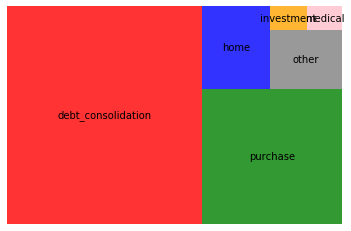

In [57]:
df = pd.DataFrame({'purpose':loan_filtered['purpose'].value_counts(), 'group':["debt_consolidation", 
                                                                                 "purchase", "home", "other", 
                                                                                 "investment", "medical"] })
import squarify 
squarify.plot(sizes=df['purpose'], label=df['group'], color=["red","green","blue", "grey", "orange", "pink"], alpha=.8)
plt.axis('off')
plt.show()

There are some variables in our dataset, e.g 'pymnt_plan' or 'hardship_flag', which by themselves are dummies, we only need to rencode them ir order to change their types from categorical to numeric.

In [58]:
loan_filtered.groupby('initial_list_status')['target'].value_counts()

initial_list_status  target
f                    0         111523
                     1          28564
w                    0         148881
                     1          43052
Name: target, dtype: int64

'initial_list_status' give us information about if the lending club offered the whole loan to the borrower or only a fraction of the loan. Independently of that, we want to know if the borrower will pay the loan. We do not mind if the loan was given fully or partially. Also, we can see that the percentage of defaults its similar in both types of status.

In [61]:
del loan_filtered['initial_list_status']

In [62]:
loan_filtered.groupby('disbursement_method')['target'].value_counts()

disbursement_method  target
Cash                 0         259270
                     1          71185
DirectPay            0           1134
                     1            431
Name: target, dtype: int64

According to the same reason we delete 'disbursement_method'.

In [65]:
del loan_filtered['disbursement_method']

Due to all the transformations done, the index of the dataframe has changed and it does not follow the typical sequency of numbers, so we will reset the index to avoid future problems.

In [66]:
loan_filtered = loan_filtered.reset_index(drop = True)

In [67]:
categoricas = loan_filtered.select_dtypes(include = [np.object])
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332020 entries, 0 to 332019
Data columns (total 6 columns):
term                   332020 non-null object
emp_length             332020 non-null object
home_ownership         332020 non-null object
verification_status    332020 non-null object
purpose                332020 non-null object
application_type       332020 non-null object
dtypes: object(6)
memory usage: 15.2+ MB


In [68]:
numericas = loan_filtered.select_dtypes(include = [np.number])
numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332020 entries, 0 to 332019
Data columns (total 77 columns):
loan_amnt                         332020 non-null int64
int_rate                          332020 non-null float64
installment                       332020 non-null float64
annual_inc                        332020 non-null float64
desc                              332020 non-null int64
dti                               332020 non-null float64
delinq_2yrs                       332020 non-null float64
inq_last_6mths                    332020 non-null float64
mths_since_last_delinq            332020 non-null float64
mths_since_last_record            332020 non-null float64
open_acc                          332020 non-null float64
pub_rec                           332020 non-null float64
revol_bal                         332020 non-null int64
revol_util                        332020 non-null float64
total_acc                         332020 non-null float64
recoveries               

At this moment we have our dataset clean, filtered and dimensionally reduced, so we can continue with other instances.

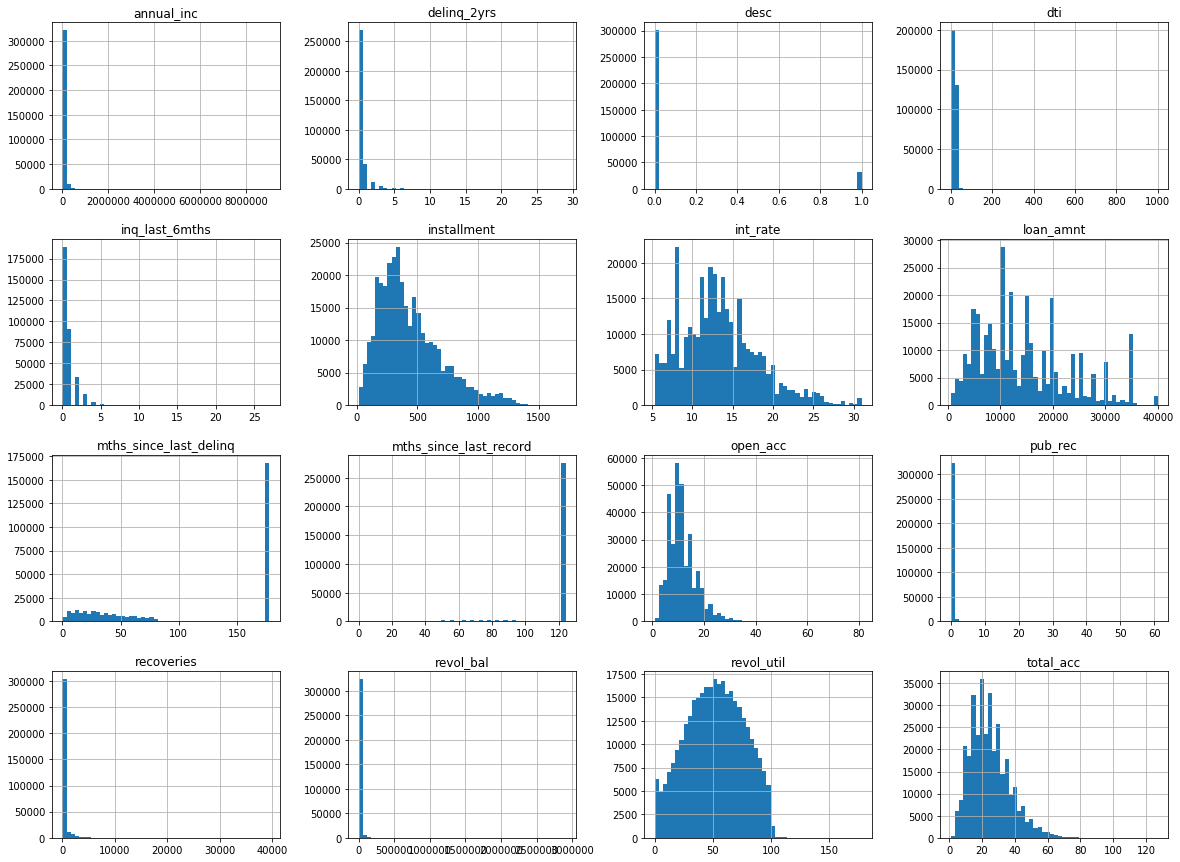

In [69]:
numericas.iloc[:,0:16].hist(bins=50, figsize=(20,15))
plt.show()

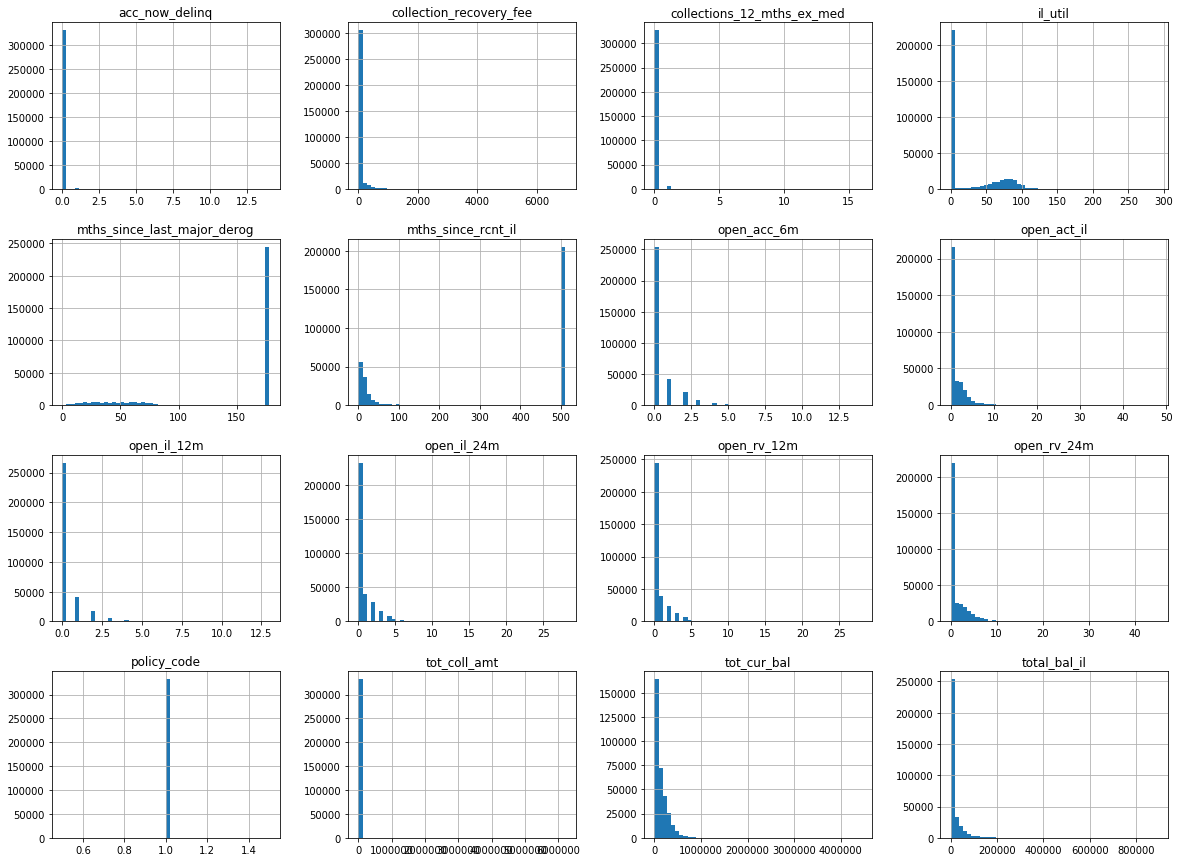

In [70]:
numericas.iloc[:,16:32].hist(bins=50, figsize=(20,15))
plt.show()

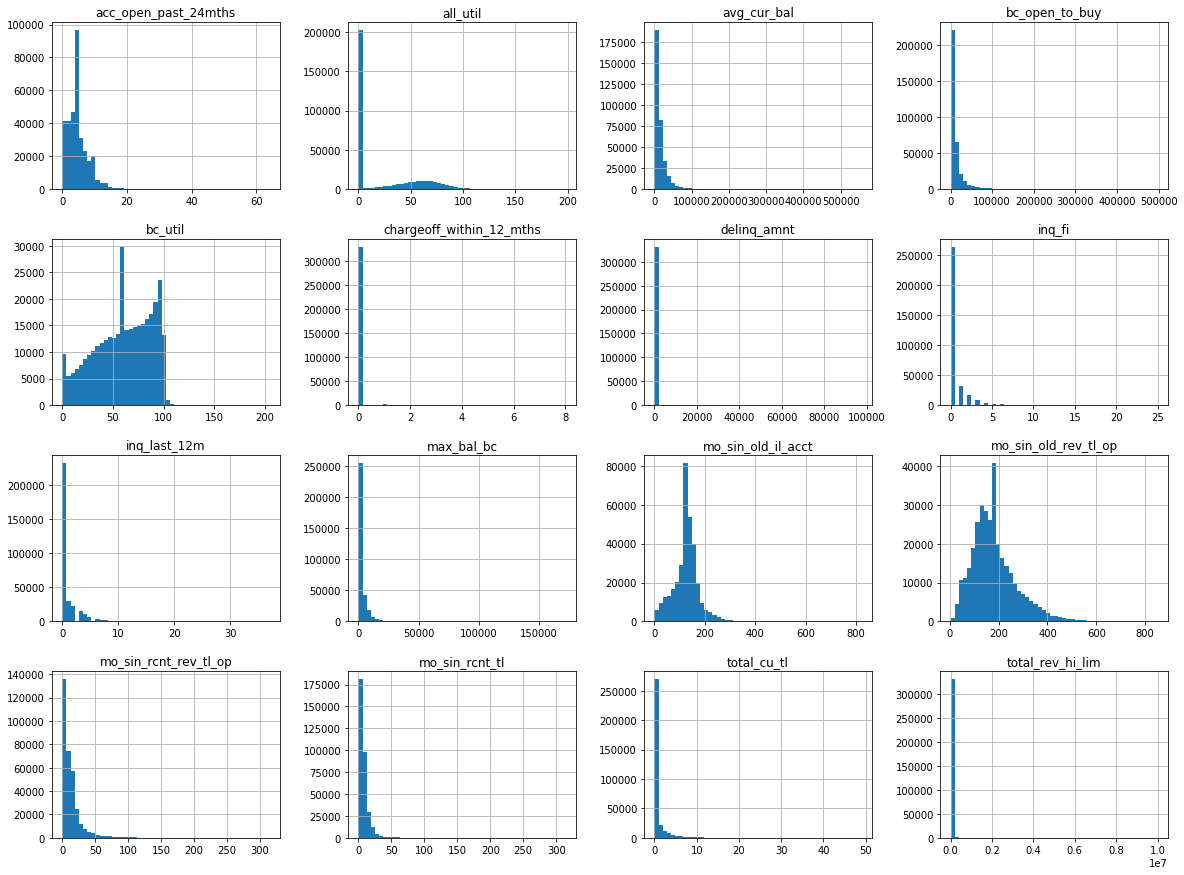

In [71]:
numericas.iloc[:,32:48].hist(bins=50, figsize=(20,15))
plt.show()

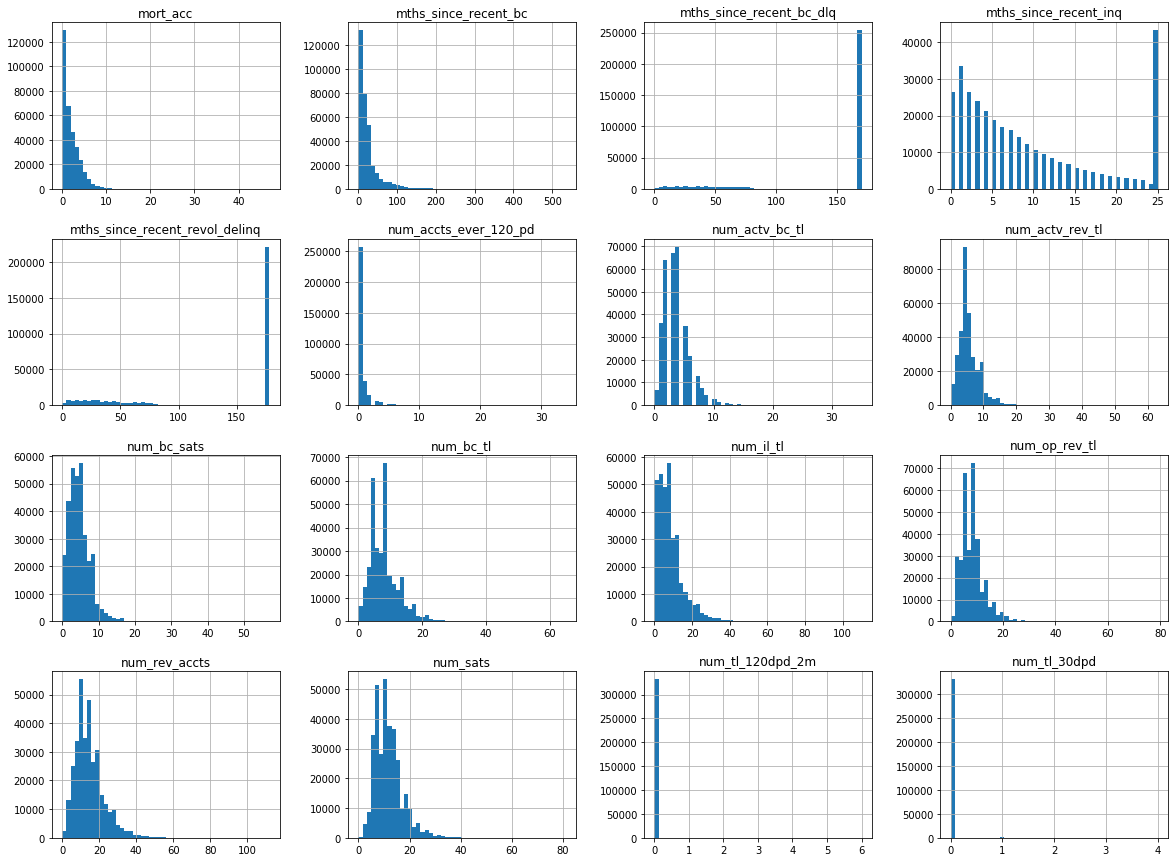

In [72]:
numericas.iloc[:,48:64].hist(bins=50, figsize=(20,15))
plt.show()

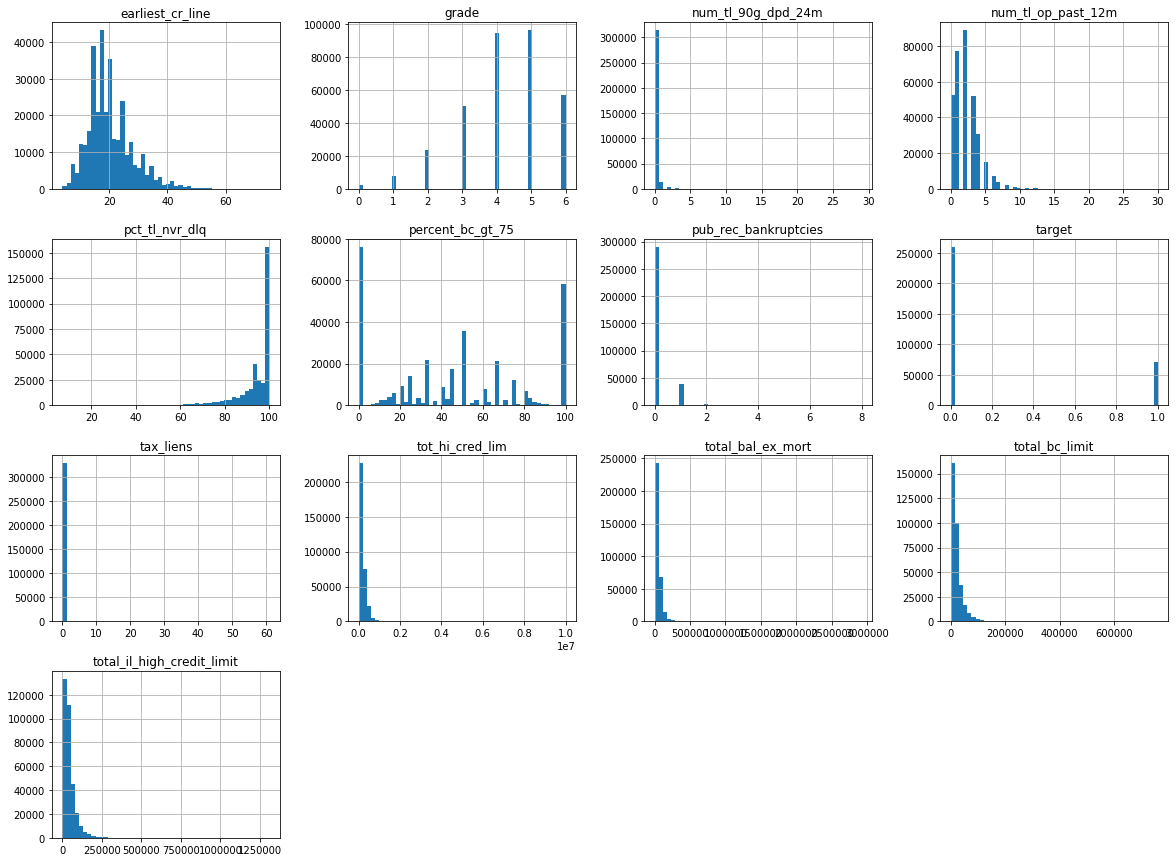

In [73]:
numericas.iloc[:,64:].hist(bins=50, figsize=(20,15))
plt.show()

### 4.1 Making dummies 

These variables are going to be converted to dummies.

In [74]:
list(categoricas)

['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'application_type']

In [75]:
dummies = pd.get_dummies(categoricas)
dummies.head()

,term_ 36 months,term_ 60 months,emp_length_6+ years,emp_length_<= 5 years,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_debt_consolidation,purpose_home,purpose_investment,purpose_medical,purpose_other,purpose_purchase,application_type_Individual,application_type_Joint App
0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0
2,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
4,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [76]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332020 entries, 0 to 332019
Data columns (total 18 columns):
term_ 36 months                        332020 non-null uint8
term_ 60 months                        332020 non-null uint8
emp_length_6+ years                    332020 non-null uint8
emp_length_<= 5 years                  332020 non-null uint8
home_ownership_OTHER                   332020 non-null uint8
home_ownership_OWN                     332020 non-null uint8
home_ownership_RENT                    332020 non-null uint8
verification_status_Not Verified       332020 non-null uint8
verification_status_Source Verified    332020 non-null uint8
verification_status_Verified           332020 non-null uint8
purpose_debt_consolidation             332020 non-null uint8
purpose_home                           332020 non-null uint8
purpose_investment                     332020 non-null uint8
purpose_medical                        332020 non-null uint8
purpose_other                      

In [77]:
# deletting the original variables to the dataset

del loan_filtered['term']
del loan_filtered['emp_length']
del loan_filtered['home_ownership']
del loan_filtered['verification_status']
del loan_filtered['purpose']
del loan_filtered['application_type']

In [78]:
dummies['target'] = loan_filtered['target']
dummies['desc'] = loan_filtered['desc']
dummies['grade'] = loan_filtered['grade']

### 4.2 Scaling

Before concatenating the dummies we will scale the numeric variables of the dataset, we are going to use the Standard method.

In [79]:
del numericas['target']
del numericas['desc']
del numericas['grade']

In [80]:
sc = StandardScaler()
num_scaled = sc.fit_transform(numericas)
num_scaled = pd.DataFrame(num_scaled, columns = numericas.columns)

In [81]:
num_scaled.head(10)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,earliest_cr_line
0,0.638293,-0.797711,0.774278,0.705425,-0.633411,-0.358858,-0.691619,0.967457,0.396028,-0.472377,...,-1.214980,0.685161,0.420426,-0.355447,-0.136824,-0.702946,-0.412788,0.470168,-0.715915,-1.353405
1,-1.370173,-0.383039,-1.362470,-0.655223,-0.080388,-0.358858,-0.691619,-0.734029,0.396028,-1.203703,...,-0.102947,-1.173300,-1.286689,-0.355447,-0.136824,-0.655414,-0.493895,0.408240,-0.304493,-0.827792
2,0.388670,0.982443,0.788672,0.689418,-0.121479,-0.358858,0.347664,-1.128774,0.396028,0.624610,...,-0.658963,-1.173300,1.558503,-0.355447,-0.136824,-0.510776,0.311324,-0.882717,0.816902,-0.959196
3,-0.566786,-1.072064,-0.535273,0.097136,0.547969,-0.358858,0.347664,-0.951819,0.396028,0.624610,...,-0.102947,0.249951,0.135907,-0.355447,-0.136824,0.033296,0.234263,-0.234856,0.638838,-0.564986
4,0.064446,-0.169421,0.242809,-0.154392,-0.397135,-0.358858,0.347664,0.967457,-1.042271,-0.106715,...,1.009087,0.685161,-0.148612,2.294420,-0.136824,-0.766524,-0.493789,-0.244384,-0.511084,1.406062
5,-0.968480,-0.864728,-0.945694,0.785463,-0.781511,-0.358858,-0.691619,0.967457,0.396028,-1.020871,...,-0.658963,-0.785140,0.135907,-0.355447,-0.136824,1.239022,-0.324758,-0.344421,-0.243060,-0.696389
6,-0.294209,0.249439,-0.608583,-0.383093,0.772260,-0.358858,-0.691619,0.967457,0.396028,1.538767,...,2.121120,0.685161,-0.066102,-0.355447,-0.136824,-0.069765,-0.180136,-0.696933,-0.544608,-0.170776
7,1.097371,-1.130704,1.196911,-0.174994,0.303988,1.905254,-0.691619,-1.278504,0.396028,-0.289546,...,1.009087,-0.020584,-1.286689,-0.355447,-0.136824,-0.463238,0.019545,0.765516,0.262367,0.617643
8,0.753063,0.680864,0.300615,-0.415108,0.179002,-0.358858,-0.691619,0.967457,0.396028,-0.472377,...,-0.658963,0.685161,0.135907,-0.355447,-0.136824,-0.645623,-0.637964,-0.068127,-0.644537,-1.090599
9,0.810447,-0.864728,0.945896,0.241204,1.109553,-0.358858,-0.691619,-0.965431,0.396028,2.635754,...,2.677137,0.367576,-1.067610,-0.355447,-0.136824,0.164578,1.484062,1.260939,1.997374,-0.170776


In [82]:
# concatenating the dummies

loan_filtered_final = pd.merge(num_scaled, dummies, left_index=True, right_index=True)
loan_filtered_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332020 entries, 0 to 332019
Data columns (total 95 columns):
loan_amnt                              332020 non-null float64
int_rate                               332020 non-null float64
installment                            332020 non-null float64
annual_inc                             332020 non-null float64
dti                                    332020 non-null float64
delinq_2yrs                            332020 non-null float64
inq_last_6mths                         332020 non-null float64
mths_since_last_delinq                 332020 non-null float64
mths_since_last_record                 332020 non-null float64
open_acc                               332020 non-null float64
pub_rec                                332020 non-null float64
revol_bal                              332020 non-null float64
revol_util                             332020 non-null float64
total_acc                              332020 non-null float64
recover

In [83]:
loan_filtered_final.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,purpose_home,purpose_investment,purpose_medical,purpose_other,purpose_purchase,application_type_Individual,application_type_Joint App,target,desc,grade
0,0.638293,-0.797711,0.774278,0.705425,-0.633411,-0.358858,-0.691619,0.967457,0.396028,-0.472377,...,0,0,0,0,1,1,0,0,0,5
1,-1.370173,-0.383039,-1.362470,-0.655223,-0.080388,-0.358858,-0.691619,-0.734029,0.396028,-1.203703,...,0,0,0,0,1,1,0,0,0,5
2,0.388670,0.982443,0.788672,0.689418,-0.121479,-0.358858,0.347664,-1.128774,0.396028,0.624610,...,0,0,0,0,0,1,0,1,0,3
3,-0.566786,-1.072064,-0.535273,0.097136,0.547969,-0.358858,0.347664,-0.951819,0.396028,0.624610,...,0,0,0,0,1,1,0,0,0,5
4,0.064446,-0.169421,0.242809,-0.154392,-0.397135,-0.358858,0.347664,0.967457,-1.042271,-0.106715,...,0,0,0,0,0,1,0,1,0,5


In [84]:
loan_filtered_final.to_csv('../data/DE_test_set.csv', index = None, header=True)